<a href="https://colab.research.google.com/github/KFurudate/Quantum_computer/blob/main/001_qubit_ja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Blueqatさんのチュートリアルで勉強させていただきました！

https://github.com/Blueqat/Blueqat-tutorials/blob/master/tutorial-ja/001_qubit_ja.ipynb

## 量子ビットの操作

### １量子ビットの計算

In [1]:
!pip install blueqat

     |████████████████████████████████| 71kB 6.7MB/s 


### 量子回路の作成

量子コンピュータでは、量子ゲートを順番に繋げた、量子回路を作ります。

Circuitで回路を準備し、その後ろに量子ゲートを繋げます。

今回はxゲートを0番目の量子ビットにかけてみましょう。
xと書き、カッコの中に量子ビットの番号である0を入れます。

最後に答えを取り出す測定を、mと書いて、runで100回実行をします。

最初に回路を作るためのツール読み込み、２行目に量子回路を書いてみます。

In [2]:
from blueqat import Circuit
Circuit().x[0].m[:].run(shots=100)

Counter({'1': 100})

答えは1が100回出ました。 

このとき、量子回路は0からスタートし、以下のようになります。

0 ----X---

今回は0からスタートし、0を1にするXゲートを使って最初の計算を行いました。

ここでは 1量子ビット操作の概要を説明します。

### 量子ビット

古典コンピュータは1bitに対して0または1の値を入力することができます。

量子ビットでは1bitのことを1qubitと言い、ベクトルで表現します。

$\lvert0\rangle$, $\lvert1\rangle$ はそれぞれ

$$
\lvert0\rangle = \begin{pmatrix}1\\0\end{pmatrix} , \lvert 1 \rangle = \begin{pmatrix}0\\1\end{pmatrix}
$$

と表します。

一般的に1qubitには $\lvert0\rangle$, $\lvert1\rangle$ と複素数 $\alpha,\beta$ を用いて $\alpha\lvert0\rangle+\beta\lvert1\rangle$ で表せます。


ただし、



$$
|\alpha|^2 + |\beta|^2 = 1
$$

である必要があります。

### 回路の作成

初期値を $|0\rangle$ とします。

回路はゲートと呼ばれる行列をかけて作ります。

試しにXゲートをかけてみます。

Xゲートは以下のような行列です。

$$
X = \begin{pmatrix} 0&1\\1&0\end{pmatrix}
$$

これを $|0\rangle$ にかけると

$$
X \lvert 0 \rangle = \begin{pmatrix} 0&1\\1&0\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix} = \lvert 1 \rangle
$$


と $\lvert1\rangle$ に反転できることがわかります。

### 測定

量子コンピュータでは確率的に 0,1 が出力されますがこの出力させる操作を測定と言います。

0,1 それぞれの出力される確率は $\alpha\lvert0\rangle+\beta\lvert1\rangle$ に対して、それぞれ $|\alpha|^2, |\beta|^2$ となります。

例えば以下のようなビットを考えます。

$$
\frac{1}{\sqrt{2}}\lvert0\rangle + \frac{1}{\sqrt{2}}\lvert1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix}
$$

これを1回測定すると 0,1 が出力される確率はそれぞれ 1/2 となります。

つまり100回測定した場合は 0,1 はそれぞれ 50回ずつ出力されます。

### 状態ベクトル

一般的に上記で述べたベクトルを状態ベクトルと言います。

回路を作成し最終的にできた状態ベクトルは測定をした場合に 0,1 で出力されます。

Blueqatで状態ベクトルを求めるには、測定をせずに.run()メソッドを実行します。

In [4]:
Circuit().h[0].run()

array([0.70710678+0.j, 0.70710678+0.j])

### ２量子ビットの計算

量子コンピュータでは、複数の量子ビットの操作により、複雑な計算を行うことができます。

### 量子回路の作成

量子回路の作成方法は１量子ビットの場合と同じです。CXゲートを使ってみます。

小文字でcxと書き、カッコの中に、0と1をカンマで繋げて記入します。

そして、測定を行うmをかいて、runで100回実行します。

In [5]:
Circuit().cx[0,1].m[:].run(shots=100)

Counter({'00': 100})

00という答えが100回出ました。


CXゲートは、「コントロールビット」と「ターゲットビット」を順番に指定します。

これは、コントロールビットの値が1の時だけ、ターゲットビットにXゲートをかけます。

今回は、量子ビットは、両方とも0からスタートして、cxゲートがかかりました。

コントロールビットが0なので、ターゲットビットには何もおきません。回路は以下のようになります。

0 ---*---
     
     |
0 ---X---

次にコントロールビットにXゲートをかけて、0を1にしてから、CXゲートをかけてみます。

In [6]:
Circuit().x[0].cx[0,1].m[:].run(shots=1)

Counter({'11': 1})

110となりました。最初の2量子ビットは計算に使用されましたが、最後の量子ビットは使用されないままでした。以上です。

### 量子ビット(２量子ビット）

２量子ビットの場合は 00, 01, 10, 11 は以下のような状態ベクトルで表します。


00 の状態ベクトルはテンソル積を用いると以下のように計算できます。

$$
\lvert00\rangle = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} , 
\lvert01\rangle = \begin{pmatrix}0\\1\\0\\0\end{pmatrix} , 
\lvert10\rangle = \begin{pmatrix}0\\0\\1\\0\end{pmatrix} , 
\lvert11\rangle = \begin{pmatrix}0\\0\\0\\1\end{pmatrix} 
$$

00 の状態ベクトルはテンソル積を用いると以下のように計算できます。

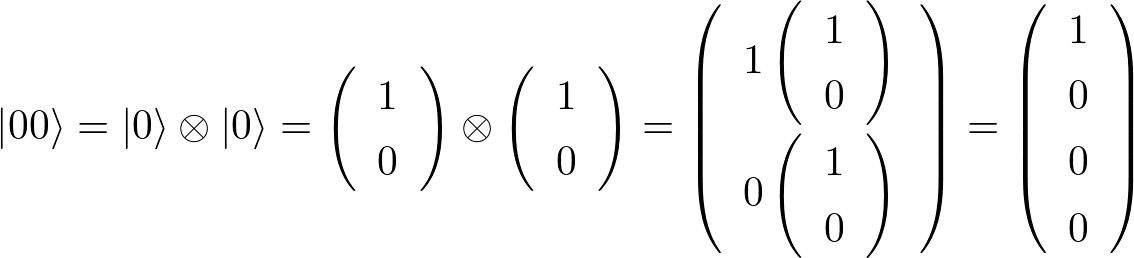

### CX回路

CXゲートはコントロールビットが1ならばターゲットビットにXゲートを施すものです。

CXゲートは以下のような行列です。

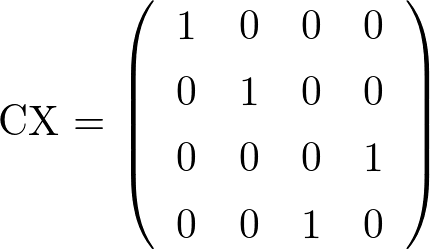

00 にCXゲートを施すと以下のようになります。

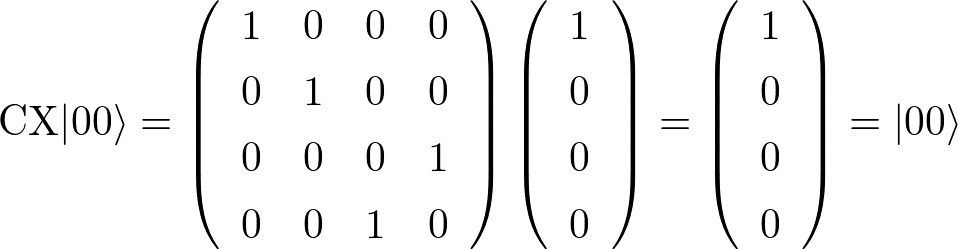

この場合コントロールビットは0なので何も変化しません。

次に 10 にCXゲートを施すと以下のようになります。

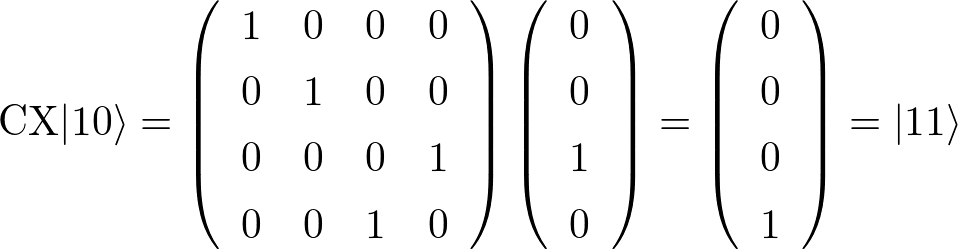

この場合コントロールビットは1なのでターゲットビットが反転して1になっているのがわかります。

### 測定

２量子ビットの場合の測定は 00, 01, 10, 11 が確率的に観測されます。
それぞれ出力される確率は１量子ビットの場合と同じように各係数の絶対値の2乗となります。

例えば以下のような状態ベクトルを考えます。

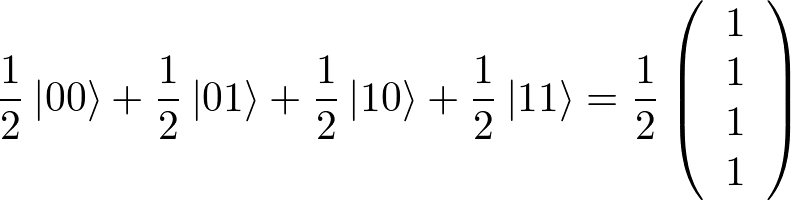

これを1回測定すると 00, 01, 10, 11 が出力される確率は 1/4 となります。

### 2量子ビット以上の場合

３量子ビットの場合で最初の２量子ビットにCXゲートをかけるとします。 100 にCXを施したとき計算は以下のようになります。

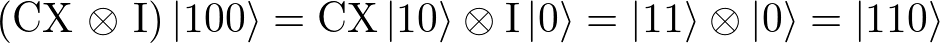

上の式から最後のビットには何も変化しない行列Iを施して計算していることがわかります。